<img src="Figuras - Desafio 2/logo1.png" style="width:450px;height:150px"/>

# Ilum Escola de Ciência
### Curso: Termodinâmica Avançada
### Prof: Amauri Jardim de Paula
### Alunos: Gabriel Pereira e Isabela Beneti
### Desafio 2

#
## Descrição do desafio
O primeiro desafio para solução do problema principal da disciplina envolve:

#### **O cálculo de todas as variáveis envolvidas nos processos termodinâmicos que fornecerão energia ao ciclo Rankine.**

Padronização: uma tonelada em massa da mistura! --> calcular o volume

## Problemas

#### As tabelas de variáveis termodinâmicas são dadas para condições padrão de temperatura e pressão. No caso da temperatura, se uma determinada reação química for usada em uma temperatura diferente da padrão, correções devem ser feitas.

##### A. Volume da mistura de líquidos.
##### B. Determinação da separação da mistura.
##### C. Determinação da não-idealidade das misturas.
##### D. Determinação da temperatura mínima de ebulição da mistura.
##### E. Determinação de potenciais termodinâmicos da reação de cobustão.


#
## Resoluções

### Importações

In [1]:
# Rode essa célula antes de rodar as seguintes, pois elas se utilizam das seguintes bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes_desafio_2 import porcentagem_em_massa
from funcoes_desafio_2 import volume_total_mistura
from funcoes_desafio_2 import destilacao_fracionada
from funcoes_desafio_2 import caminho
from funcoes_desafio_2 import create_frame
from funcoes_desafio_2 import delta_S_mistura
import imageio

### Problema A

<center>
  <img src='./Figuras - Desafio 2/Esquema do Curso.png' style="width:900px;height:500px"/>
    
    Figura 1: esquema do curso e desafios
</center>

#### Objetivo: 
Calcular o volume da mistura de dois líquidos

#### O que temos: 
- Razão volumétrica da mistura
- Densidade de cada substância
- Tabela com densidade da substância por razão em massa e temperatura

#### O que iremos fazer:
- Uma função que calcula a razão em massa da mistura a partir da razão volumétrica e da densidade de cada substância
- Encontrar a densidade da mistura levando em conta a razão em massa da mistura e da temperatura (ambiente).
- Uma função que calcula, a partir da densidade da mistura e da massa total, o volume total da mistura.

Em sala de aula, o professor Amauri estabeleceu uma massa total padrão da mistura: uma tonelada. A partir disso, podemos chegar ao volume da nossa mistura se tivermos o valor da densidade da nossa mistura na razão de etanol que escolhemos. 

Esse valor pode ser encontrado na literatura, como mostrado na tabela 1, mas ele é dado em função da razão **em massa** de etanol na mistura. Entretanto, nós só temos as razões **em volume** (40%) e **molar** (0.17). Logo, se faz necessário calcular a razão **em massa** de etanol na mistura, a partir da porcentagem em volume.

Para tanto, desenvolvemos a função "porcentagem_em_massa" que, a partir dos valores da razão (porcentagem) **em volume do etanol**, determinada no Desafio 1 como 40%, e das densidades do etanol e da água, retorna a razão em porcentagem de etanol na solução:

In [2]:
porcentagem_em_massa(40, 0.789, 0.9982)

34.50990683637318

Portanto, a porcentagem de masssa de etanol na nossa mistura é de cerca de 34.5%.

Agora, vamos para a literatura encontrar a densidade da mistura de etanol e água exatamente nessa proporção:

<center>
  <img src='./Figuras - Desafio 2/Tabela_densidade.png' style="width:1200px;height:200px"/>
    
    Tabela 1: densidade da mistura de etanol com água nas concentrações de 34.0% até 34.9% v/v de etanol
</center>

Fonte: [HandyMath](https://www.handymath.com/cgi-bin/ethanolwater3.cgi?submit=Entry)

Conforme a tabela, a densidade da mistura de água e etanol com etanol a 34.5% m/m é 0.94587

Por fim, basta dividir o valor da massa da mistura (definida, pelo professor, como 1000 kg) por essa densidade- conta que é feita pela função "volume_total_mistura".

In [3]:
DENSIDADE_ETANOL_AGUA = 0.94587

In [4]:
volume_total_mistura(DENSIDADE_ETANOL_AGUA, 1000)

1057.2277374269192

Chegamos, enfim, o volume da mistura: aproximadamente 1057,23 Litros (ou dm³)!

##
### Problema B

#### Objetivo
Determinar a separação da mistura e as condições de temperatura e pressão de vapor durante o processo

#### O que temos:
- Um dataframe com fotos os dados de um diagrama de fases, medido experimentalmente
- A fração molar de etanol na mistura (0.17)

#### O que iremos fazer
- Criar uma função que, a partir da fração molar presente, encontra a temperatura de ebulição da substância mais volátil no diagrama de fases da mistura e, a partir dessa temperatura, encontra a nova composição do vapor de acordo com o diagrama de fases da mistura.

- Repetir o processo por vezes o suficiente para separar as duas misturas.

- Plotar o resultado em um gráfico dinâmico.

O método escolhido para separar a água e o etanol da mistura foi a **destilação fracionada**. A destilação fracionada é um método de separação de misturas líquidas que é baseado nas diferenças de pontos de ebulição dos componentes da mistura e que é comumente utilizado quando a diferença da temperetura de ebulição dos componentes é menor que 80°C, como é o caso do nosso problema.

A partir de um diagrama de fases,  é possível prever o comportamento da mistura durante a destilação fracionada e estabelecer as condições de temperatura e pressão de vapor do processo, como é mostrado no gif 1:

<center>
  <img src='./Figuras - Desafio 2/explicacao_destilacao.gif' style="width:450px;height:400px"/>
    
    Gif 1: processo de destilação fracionada representado num diagrama de fases
</center>

Em primeiro lugar, vamos importar e ler o dataframe que contem os dados do diagrama de fases:

In [5]:
ARQUIVO_EXCEL = "Dados - Desafio 2/Diagrama de Fases - Etanol e Água.xlsx" # Chamando o arquivo excel com dados experimentais obtido no site Home Distiller
NOME_DA_PLANILHA_O = "Sheet1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 1  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [1, 4, 7] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_et_h2o = pd.read_excel( # Criando o Data Frame do diagrama de fases da mistura escolhida (etanol + água)
    ARQUIVO_EXCEL,
    sheet_name=NOME_DA_PLANILHA_O,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_et_h2o.head()

,Mole Fraction,C,Mole Fraction.1
0,0.000,100.00,0.000
1,0.002,99.65,0.021
2,0.004,98.95,0.043
3,0.006,98.55,0.062
4,0.008,98.05,0.085


Agora, é necessário desenvolver uma função que realiza o processo mostrado no gif 1, retornando as devidas temperaturas de ebulição e o equilíbrio líquido-vapor de cada temperatura.
A função "destilacao_fracionada" foi desenvolvida para esse fim e retorna as coordenadas dos pontos críticos a partir do dataframe do diagrama de fases, do número de etapas de destilação fracionada e da concentração molar inicial de etanol na mistura.

In [6]:
lista_pontos= destilacao_fracionada(df_et_h2o, 4, 0.17)

In [7]:
lista_pontos

[[0.171, 83.96],
 [0.513, 83.96],
 [0.513, 79.6832],
 [0.661, 79.6832],
 [0.661, 78.767],
 [0.733, 78.767],
 [0.733, 78.475],
 [0.773, 78.475]]

Para tornar o processo de destilação mais didático, desenovlvemos o código abaixo para criar um gif que mostra as etapas da separação:

In [8]:
# Utilizando a função "caminho", criamos "pontos intermediários" entre os pontos críticos obtidos acima, para que o gif ficasse mais "fuído"
PASSO_X = 0.005
PASSO_Y = PASSO_X*20 # O passo em x difere do passo em y devido à escala dos eixos

lista_final = caminho(lista_pontos, PASSO_X, PASSO_Y) 

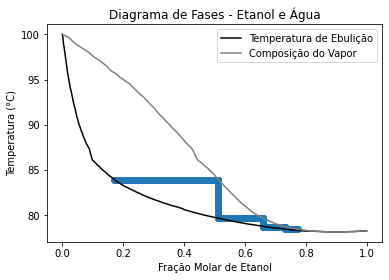

In [9]:
# Plotamos o diagrama de fases com os pontos críticos e intermediários
fig = plt.figure()
ax1 = fig.add_subplot(111)
df_et_h2o.plot('Mole Fraction','C',legend=True, label = "Temperatura de Ebulição", ax=ax1, kind = 'line', color = 'black') # Plotando Temperatura de ebulição
df_et_h2o.plot('Mole Fraction.1','C',legend=True, label = "Composição do Vapor", ax=ax1, kind = 'line', color = 'gray') # Plotando composição do vapor
x = [ponto[0] for ponto in lista_final]
y = [ponto[1] for ponto in lista_final]
plt.scatter(x, y)
plt.title('Diagrama de Fases - Etanol e Água') # Definindo título do gráfico
plt.xlabel('Fração Molar de Etanol') # Definindo legendas dos eixos
plt.ylabel('Temperatura (°C)')
#plt.ylim(75, 90)
plt.show() # Plotando o diagrama de fases da mistura escolhida (etanol + água)

In [10]:
# Transformamos as tuplas retornadas pela função "destilacao_fracionada", que contêm as coordenadas dos pontos críticos, em duas listas
x = [ponto[0] for ponto in lista_final]
y = [ponto[1] for ponto in lista_final]

In [11]:
# Iteramos a função "create_frame", que cria um frame, para criar todos os frames
for t in range(len(lista_final)):
    create_frame(t, x, y, df_et_h2o)

In [12]:
# Salvamos frames e colocando em lista, para criar o gif
frames = []
for t in range(len(lista_final)):
    image = imageio.imread(f'./Figuras - Desafio 2/img_{t}.png')
    frames.append(image)

In [13]:
# Criamos e salvando o gif!!!
imageio.mimsave('./Figuras - Desafio 2/example.gif', # output gif
                frames,          # array of input frames
                fps = 50)         # optional: frames per second

<center>
  <img src='./Figuras - Desafio 2/example.gif' style="width:500px;height:400px"/>
    
    Gif 2: processo de destilação fracionada da nossa mistura
</center>  

Agora você pode ver, de maneira dinâmica, como a destilação fracionada da nossa mistura de água com etanol 40% m/m ocorre!

Percebe-se que, a partir de 4 etapas, as coordenadas dos pontos param de variar. No entanto, não conseguimos alcançar a pureza do etanol (que seria a fração molar "1"). Afinal, a mistura de álcool etílico + água é azeotrópica e, por isso, possui esse comportamento em altas concentrações de etanol.

### Problema C

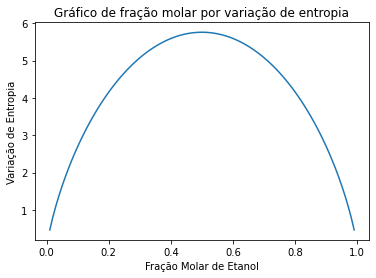

In [16]:
y=[]
x = [i / 100 for i in range(1, 101)]
for i in x:
    y.append(delta_S_mistura(i))
fig = plt.figure()
plt.plot(x, y)
plt.title('Gráfico de fração molar por variação de entropia') # Definindo título do gráfico
plt.xlabel('Fração Molar de Etanol') # Definindo legendas dos eixos
plt.ylabel('Variação de Entropia')
plt.show() # Plotando o gráfico de ração molar por variação de entropia

### Problema D

# Acesse o repositório do projeto!

Para melhor compreensão de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Repositório do Github](https://github.com/benetao/Termodinamica_Avancada), onde estão armazenados todos os notebooks e informações referentes aos desafios:

https://github.com/benetao/Termodinamica_Avancada

#
## Referências
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
- Livro Richard Feynman, Lições de Física Vol 1, Editora Bookman.
        Capítulo de Teoria Cinética dos Gases